## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 1.3 MB/s eta 0:00:00a 0:00:01


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа №5

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [85]:
average_ratings_data = np.load("data/average_ratings.npy")

average_ratings_data

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

In [86]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

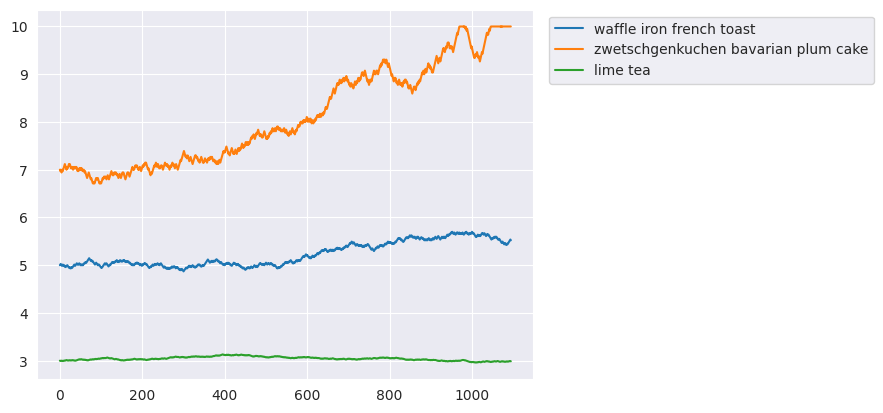

In [87]:
x = np.arange(0, len(average_ratings_data[0]))

y_1 = average_ratings_data[0]
y_2 = average_ratings_data[1]
y_3 = average_ratings_data[2]

plt.plot(x, y_1, label="waffle iron french toast")
plt.plot(x, y_2, label="zwetschgenkuchen bavarian plum cake")
plt.plot(x, y_3, label="lime tea")
plt.legend(loc="upper right", bbox_to_anchor=(1.7, 1))

In [88]:
import pandas as pd

average_ratings_df = pd.DataFrame()
data_range = pd.date_range(start="01.01.2019", end="30.12.2021")

average_ratings_df["Date"] = data_range
average_ratings_df["Waffle"] = y_1
average_ratings_df["Cake"] = y_2
average_ratings_df["Tea"] = y_3

average_ratings_df

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3378: UserWarning: Parsing '30.12.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Waffle,Cake,Tea
0,2019-01-01,5.000000,7.000000,3.000000
1,2019-01-02,5.013103,6.970750,2.996861
2,2019-01-03,5.026240,7.000000,2.993725
3,2019-01-04,5.013103,6.970750,2.996861
4,2019-01-05,5.000000,6.941621,3.000000
...,...,...,...,...
1090,2021-12-26,5.493987,10.000000,2.987464
1091,2021-12-27,5.508384,10.000000,2.990593
1092,2021-12-28,5.522819,10.000000,2.993725
1093,2021-12-29,5.537292,10.000000,2.990593


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


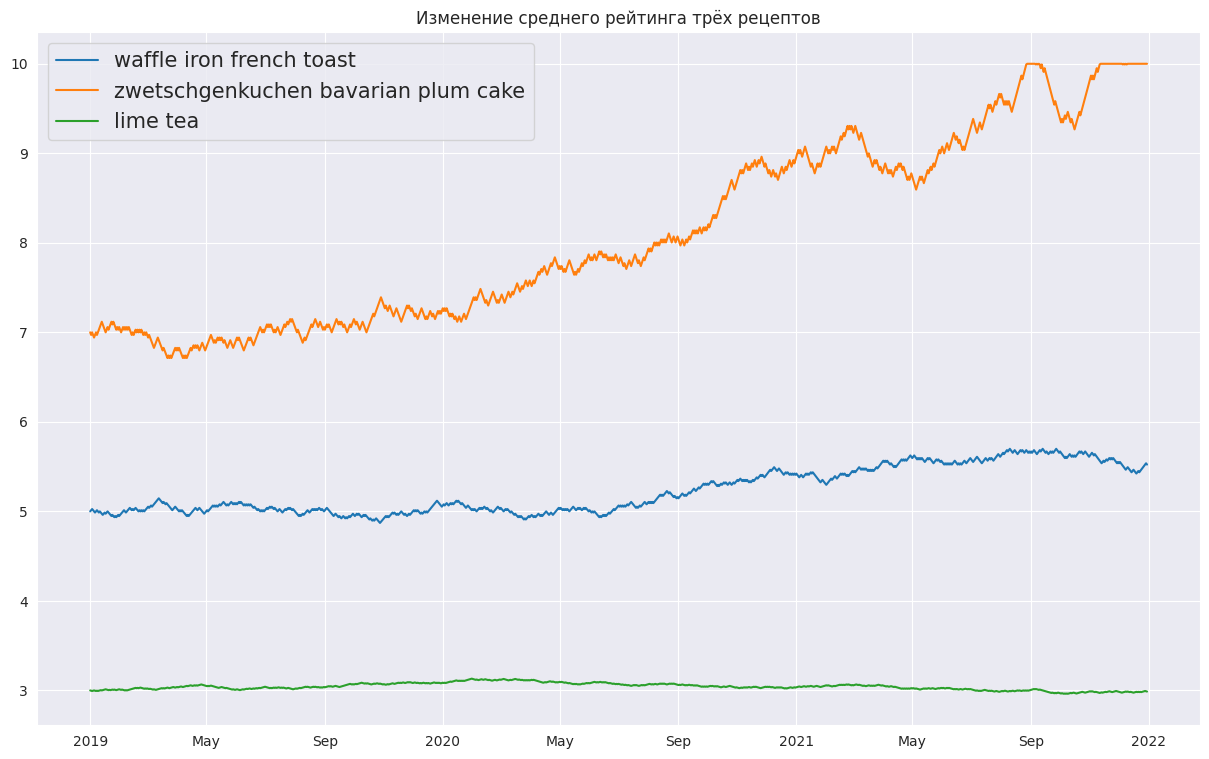

In [105]:
import matplotlib.dates as mdates

fix, axs = plt.subplots(figsize=(15, 9))

axs.plot("Date", "Waffle", data=average_ratings_df)
axs.plot("Date", "Cake", data=average_ratings_df)
axs.plot("Date", "Tea", data=average_ratings_df)

legend = ["Waffle", "Cake", "Tea"]

plt.legend(labels=['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'], fontsize=15)
axs.set_title("Изменение среднего рейтинга трёх рецептов")
axs.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(axs.xaxis.get_major_locator()))


In [90]:
import matplotlib.cbook as cbook

data = cbook.get_sample_data('goog.npz', np_load=True)['price_data']

data

array([('2004-08-19', 100.  , 104.06,  95.96, 100.34, 22351900, 100.34),
       ('2004-08-20', 101.01, 109.08, 100.5 , 108.31, 11428600, 108.31),
       ('2004-08-23', 110.75, 113.48, 109.05, 109.4 ,  9137200, 109.4 ),
       ...,
       ('2008-10-10', 313.16, 341.89, 310.3 , 332.  , 10597800, 332.  ),
       ('2008-10-13', 355.79, 381.95, 345.75, 381.02,  8905500, 381.02),
       ('2008-10-14', 393.53, 394.5 , 357.  , 362.71,  7784800, 362.71)],
      dtype=[('date', '<M8[D]'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('volume', '<i8'), ('adj_close', '<f8')])

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3378: UserWarning: Parsing '30.12.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


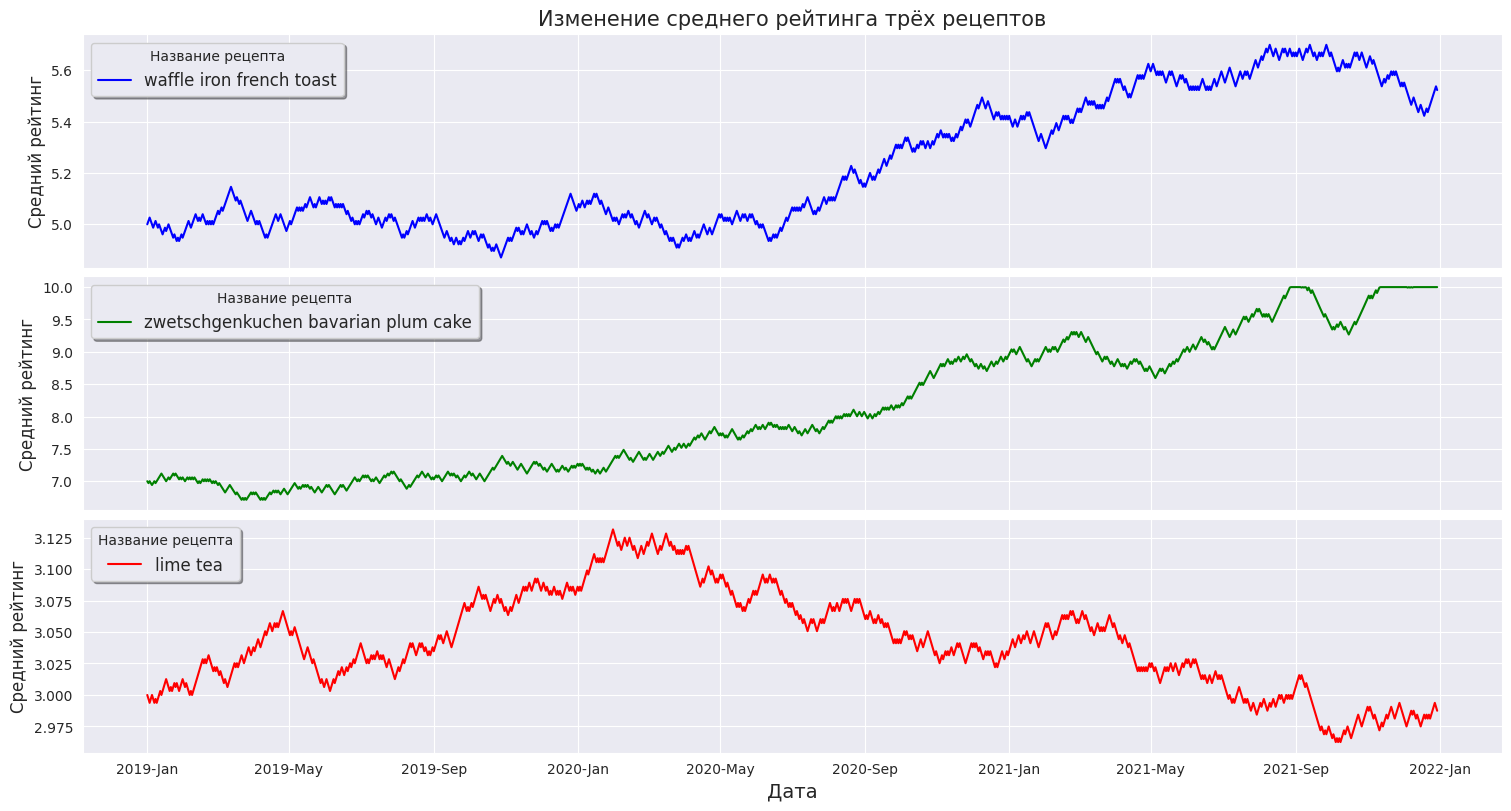

In [110]:
fig, axs = plt.subplots(3, 1, figsize=(15, 8), constrained_layout=True)
data_range = pd.date_range(start="01.01.2019", end="30.12.2021")
ind = 0
columns = ["Waffle", "Cake", "Tea"]
colors = ["blue", "green", "red"]

for i in range(3):
    axs[i].plot("Date", columns[i], colors[i], data=average_ratings_df)
    ind += 1
    axs[i].set_ylabel('Средний рейтинг', fontsize=12)


axs[0].set_title('Изменение среднего рейтинга трёх рецептов', fontsize=15)
axs[0].legend(['waffle iron french toast'], loc='upper left', shadow=True, fontsize=12, title="Название рецепта")
axs[0].set_xticklabels([])


axs[1].legend(['zwetschgenkuchen bavarian plum cake'], loc='upper left', shadow=True, fontsize=12, title="Название рецепта")
axs[1].set_xticklabels([])


axs[2].legend(['lime tea'], loc='upper left', fontsize=12, shadow=True, title="Название рецепта")
axs[2].set_xlabel('Дата', fontsize=14)

axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [76]:
visitors_data = np.load('data/visitors.npy')
visitors_data

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2], dtype=int32)

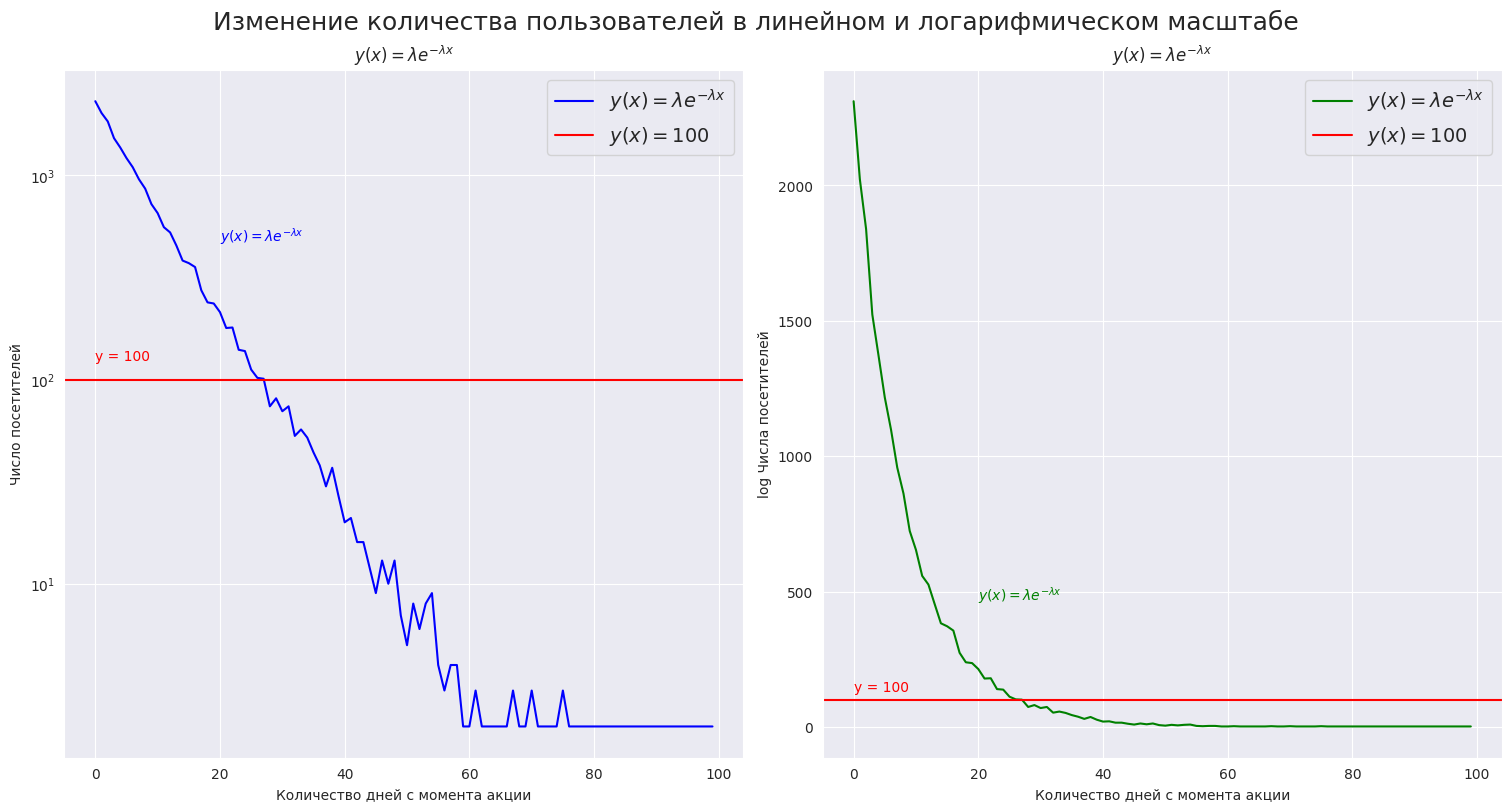

In [112]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)
colors = ['blue', 'green']

for i in range(2):
    axs[i].plot(visitors_data, colors[i])
    axs[i].axhline(y = 100, color = 'r', linestyle = '-')
    axs[i].text(0, 120, "y = 100", color = 'red', ha = 'left', va = 'bottom')
    axs[i].text(20, 450, "$y(x)=\lambda e^{-\lambda x}$", color = colors[i], ha = 'left', va = 'bottom')
    axs[i].title.set_text('$y(x)=\lambda e^{-\lambda x}$')

ax = axs[0]
ax.legend(labels=['$y(x)=\lambda e^{-\lambda x}$', '$y(x)=100$'], fontsize=14)
ax.set_yscale('log')
ax.set_xlabel("Количество дней с момента акции")
ax.set_ylabel("Число посетителей")

ax = axs[1]
ax.legend(labels=['$y(x)=\lambda e^{-\lambda x}$', '$y(x)=100$'], fontsize=14)
ax.set_xlabel('Количество дней с момента акции')
ax.set_ylabel("log Числа посетителей")

fig.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", fontsize=18)
plt.show()

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [4]:
reviews = pd.read_csv('data/reviews_sample.csv')
recipes = pd.read_csv('data/recipes_sample.csv')

In [5]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


In [6]:
reviews

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [8]:
recipes_small = recipes[recipes['minutes'] < 5]
recipes_average = recipes[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50)]
recipes_long = recipes[recipes['minutes'] >= 50]


df = pd.concat([recipes_small, recipes_average, recipes_long])

df

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
91,tasty dish s banana pudding in 2 minutes,286484,2,47892,2008-02-13,NaN,"""mmmm, i love bananas!"" a --tasty dish-- origi...",4.0
93,1 minute cake,290187,2,584365,2008-03-05,20.0,it's not a fancy cake but when you eat it warm...,NaN
104,1 minute blueberries cream,428566,2,1375473,2010-06-04,4.0,i was craving blueberry tonight but wanted non...,NaN
105,1 minute breakfast sandwich,533190,3,33186,2017-08-14,10.0,there's no excuse to skip breakfast when it's ...,12.0
143,2 minute broccoli,256464,4,165433,2007-10-01,7.0,"so easy. tender crisp. hot, steamed broccoli...",2.0
...,...,...,...,...,...,...,...,...
29994,zuppa by luisa,464576,70,226863,2011-09-20,14.0,this soup is a hearty meal! from luisa musso.,17.0
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN


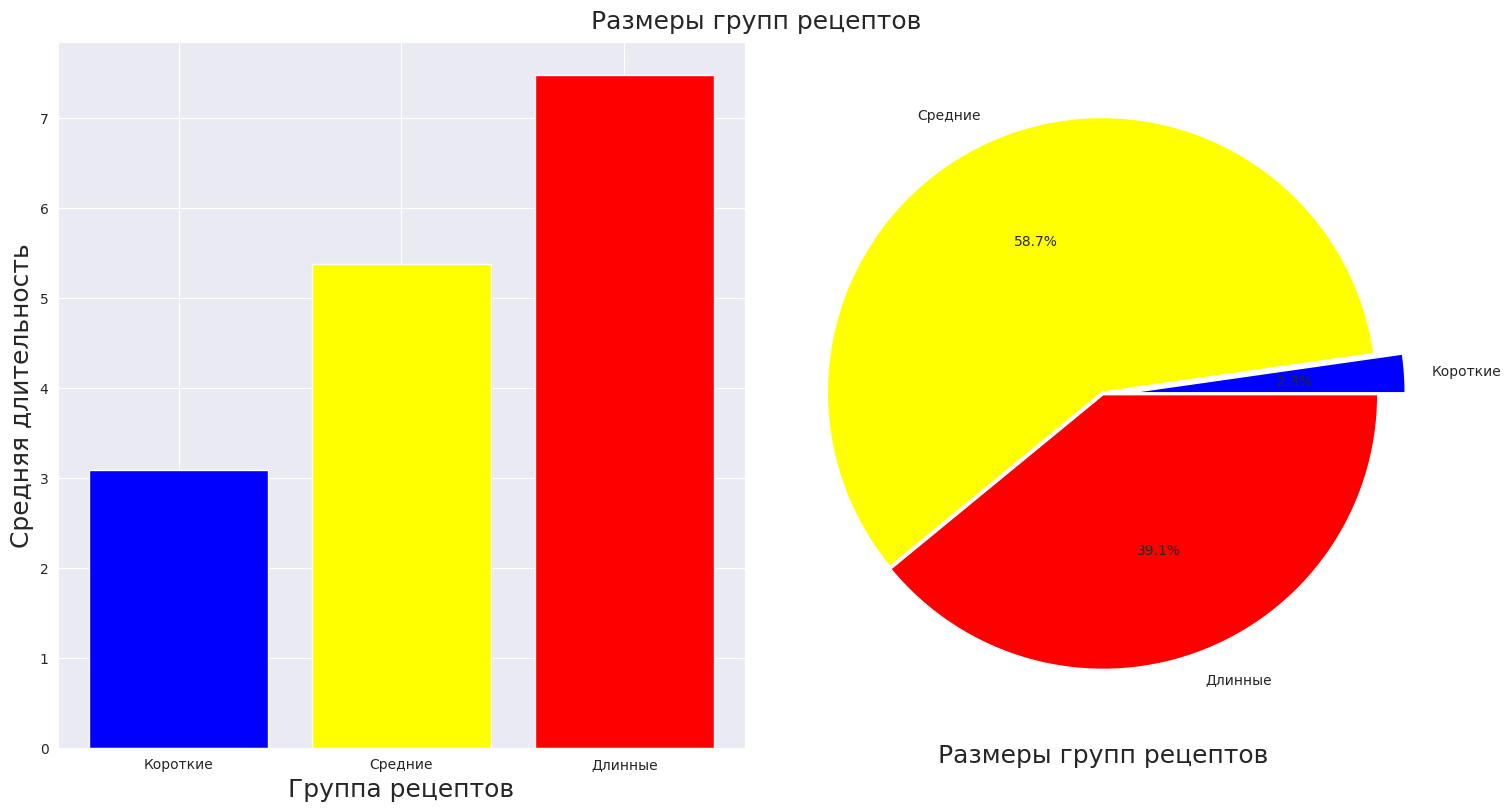

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)

ax = axs[0]

ax.bar(["Короткие", "Средние", "Длинные"], [recipes_small['n_steps'].sum(axis=0) / len(recipes_small), recipes_average['n_steps'].sum(axis=0) / len(recipes_average), recipes_long['n_steps'].sum(axis=0) / len(recipes_long)], color=['blue', 'yellow', 'red'])
ax.set_xlabel("Группа рецептов", fontsize=18)
ax.set_ylabel("Средняя длительность", fontsize=18)

ax = axs[1]
y = [len(recipes_small), len(recipes_average), len(recipes_long)]
ax.pie(y, [0.1, 0.01, 0], x, autopct='%1.1f%%', colors=['blue', 'yellow', 'red'])
ax.set_xlabel('Размеры групп рецептов', fontsize=18)
plt.suptitle("Размеры групп рецептов", fontsize=18)
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

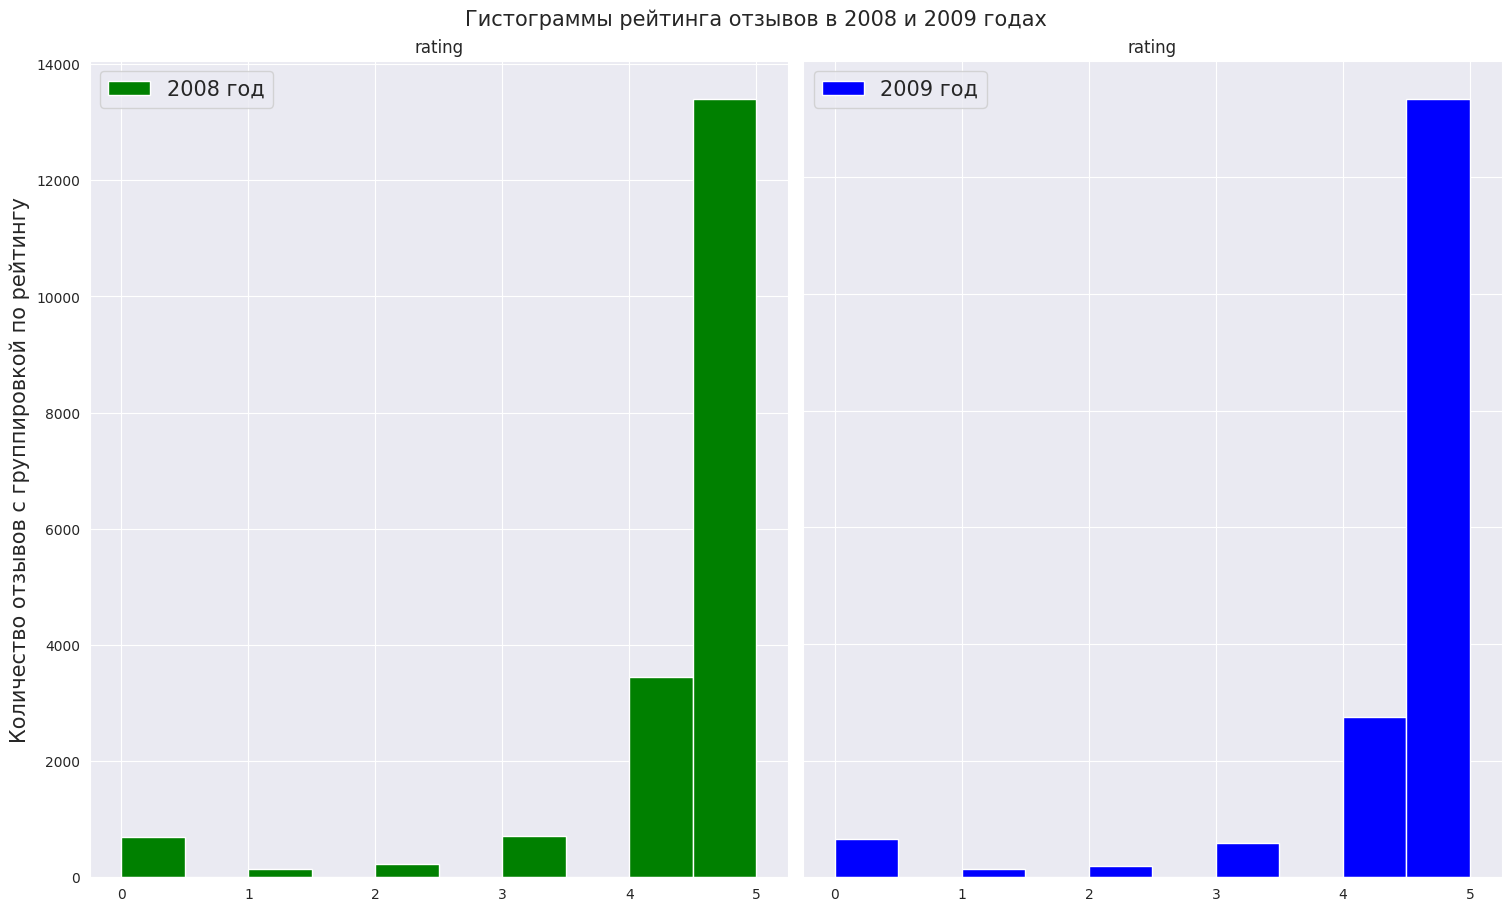

In [46]:
gist_one = reviews[(reviews['date'] > '2007-12-31') & (reviews['date'] < '2009-01-01')]
gist_two = reviews[(reviews['date'] > '2008-12-31') & (reviews['date'] < '2010-01-01')]

fig, axs = plt.subplots(1, 2, figsize=(15, 9), constrained_layout=True)
first, second = gist_one.hist(column='rating', ax=axs[0], color='green'), gist_two.hist(column='rating', ax=axs[1], color='blue')

axs[0].set_ylabel("Количество отзывов с группировкой по рейтингу", fontsize=15)
axs[0].legend(['2008 год'], loc='upper left', fontsize=15)
axs[1].legend(['2009 год'], loc='upper left', fontsize=15)
axs[1].set_yticklabels([])

plt.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах", fontsize=15)
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

<AxesSubplot: xlabel='n_steps', ylabel='n_ingredients'>

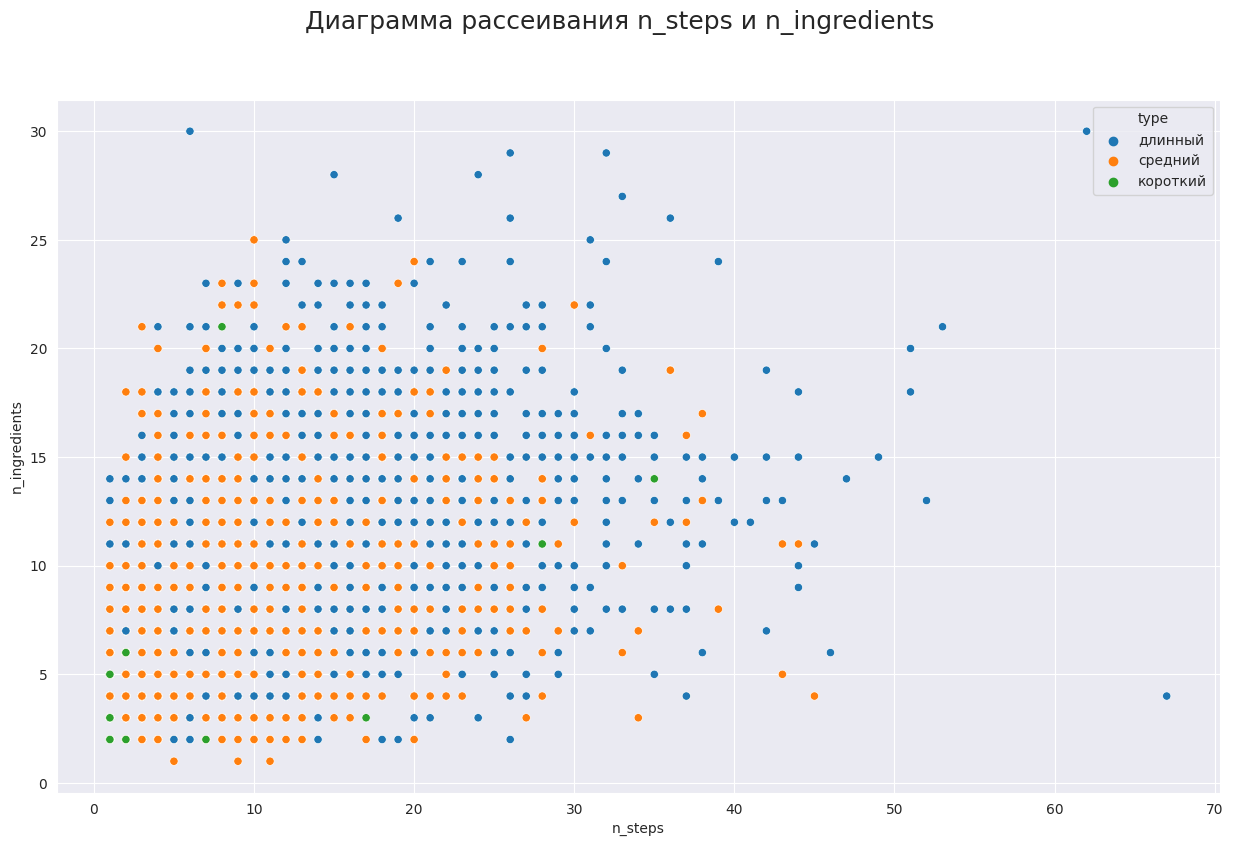

In [65]:
import seaborn as sns

plt.figure(figsize=(15, 9))
plt.suptitle('Диаграмма рассеивания n_steps и n_ingredients', fontsize=18)

sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue="type")

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

<AxesSubplot: >

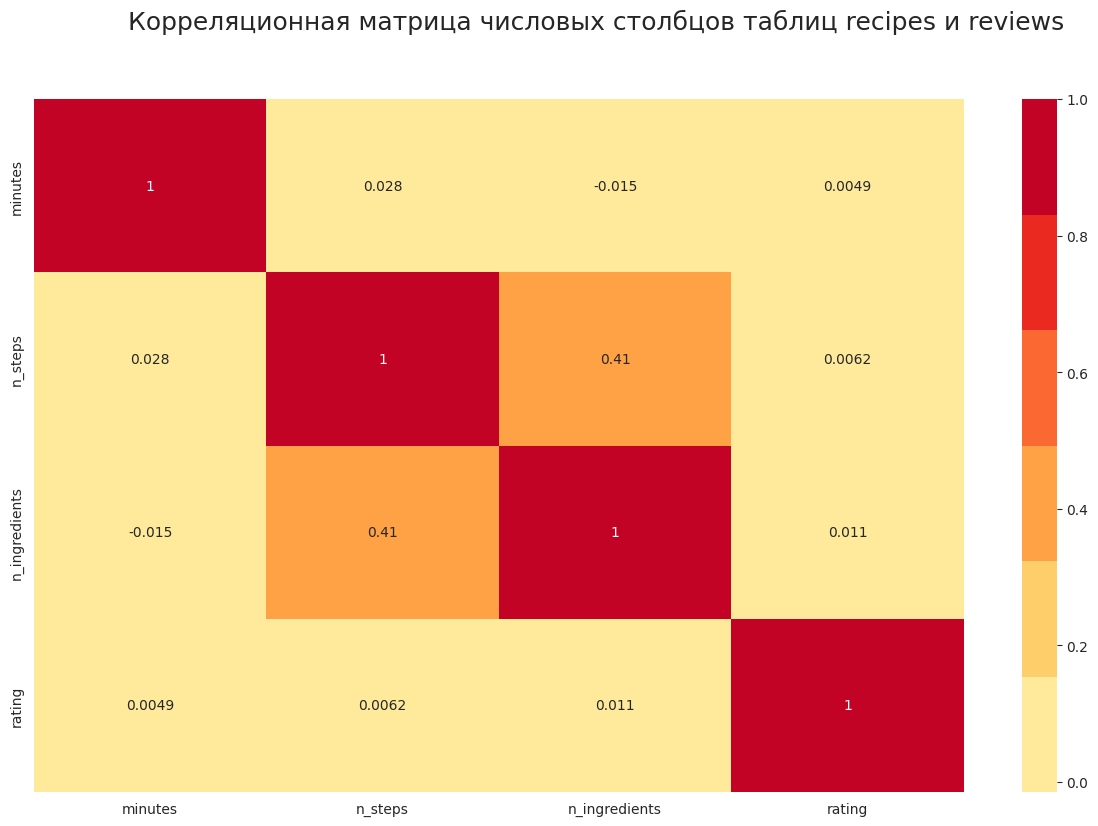

In [64]:
all_join = recipes.join(reviews)
correlation_matrix = all_join[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()

plt.figure(figsize=(15, 9))
plt.suptitle("Корреляционная матрица числовых столбцов таблиц recipes и reviews", fontsize=18)

ax0 = plt.axes()
sns.heatmap(correlation_matrix, ax=ax0, cmap=sns.color_palette('YlOrRd'), annot=True)